<a href="https://colab.research.google.com/github/FatimaNsrn/loan_status_ml/blob/main/loan_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
dataset = pd.read_csv('loanData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1   education                  4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [ ]:
dataset.shape

(4269, 12)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train

array([[       4,        0,        1, ...,  1000000,  4100000,  1600000],
       [       1,        0,        0, ...,  6100000,  8400000,  3000000],
       [       4,        0,        1, ...,  9100000, 25700000,  9600000],
       ...,
       [       3,        0,        1, ..., 10300000, 25300000,  7400000],
       [       4,        0,        0, ...,  2500000, 21000000,  6600000],
       [       1,        0,        1, ...,  7600000, 16000000,  3200000]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.87744142, -1.01144433,  1.00335234, ..., -0.92170604,
        -1.21764827, -1.05013531],
       [-0.8964388 , -1.01144433, -0.99665886, ...,  0.23806953,
        -0.7435998 , -0.62128939],
       [ 0.87744142, -1.01144433,  1.00335234, ...,  0.92029045,
         1.16361846,  1.40041278],
       ...,
       [ 0.28614801, -1.01144433,  1.00335234, ...,  1.19317882,
         1.11952093,  0.72651206],
       [ 0.87744142, -1.01144433, -0.99665886, ..., -0.58059558,
         0.64547246,  0.48145725],
       [-0.8964388 , -1.01144433,  1.00335234, ...,  0.57917999,
         0.09425331, -0.56002569]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
print(classifier.predict(sc.transform([[0.4, 0.8, 0, 0.5, 0.6, 0.5, 0.7, 0.5, 0.6, 0.7, 0.4]])))

[0]


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[444  62]
 [ 45 730]]


0.9164715066354411

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

<Axes: >

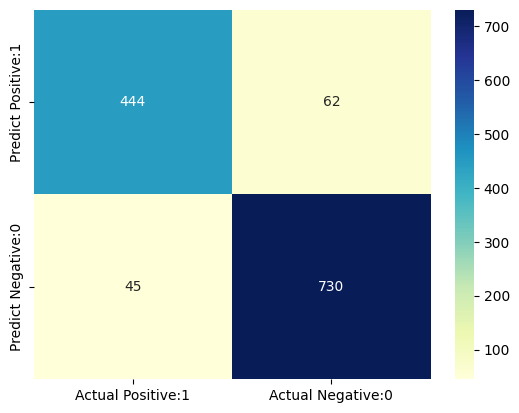

In [ ]:
import seaborn as sns
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(classifier.predict(sc.transform([[0.4, 0.8, 0, 0.5, 0.6, 0.5, 0.7, 0.5, 0.6, 0.7, 0.4]])))

[1]


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[431  75]
 [ 67 708]]


0.8891491022638564

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

<Axes: >

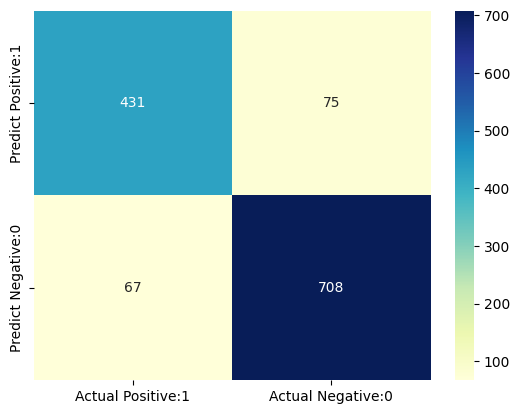

In [ ]:
import seaborn as sns
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')